### Regression Problem

In this regression problem we will try to <b>predict the fuel efficiency</b> of late-1970s and early 1980s automobiles from <b>Auto MPG</b> dataset.

This regression problem uses the <b>tf.keras</b> API.

<i>Why we are using the Keras API?</i>

Because it's easy to build model using Keras API in just 5 simple steps --
- Get the Data
- Setup model
- Train model
- Evaluate
- Predict

<i>tf.keras</i> is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a low-level API.

<b>Note: </b><i>tf.keras</i> (comes with TensorFlow) and there's <i>Keras</i> (standalone). We will be using <i>tf.keras</i> because
- It comes with TensorFlow so you don't need to install anything extra.
- It comes with powerful TensorFlow-specific features.

#### 1. Import libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Scikit-Learn train-test split 
from sklearn.model_selection import train_test_split

# Images, plots, display, and visualization
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

print("Tensorflow Version: ", tf.VERSION)
print("Pandas Version: ", pd.__version__)
print("Seaborn Version: ", sns.__version__)

C:\Users\Praneet\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow Version:  1.12.0
Pandas Version:  0.23.4
Seaborn Version:  0.9.0


In [2]:
%matplotlib inline
style.use('ggplot')

We have successfully imported all the packages and libraries. Now, let's start by downloading the dataset first.

#### 2. Get the data

Download the data file from the url.

In [3]:
dataset_path = keras.utils.get_file(fname = 'auto-mpg.data', origin = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', cache_dir = '.')
print(dataset_path)

.\datasets\auto-mpg.data


Now we have successfully downloaded our <b>auto-mpg</b> dataset. So it's time to have a look to our dataset.

Let's begin the exploratory journey into the dataset to reveal it's hidden secrets.

#### 3. Explore the Dataset

Let's have a look at the data.

In [4]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
               'Acceleration', 'Model Year', 'Origin']
"""
1. As data file does not contains the column names then we have to specify the column names manually. 
2. The Null values in the data file is represented by '?' symbol. So we have to assign it to the 
'_na_values' attributes.
3. 'skipinitialspace' attribute skip spaces after delimiter(alternative argument name for sep).
"""
raw_dataset = pd.read_csv(filepath_or_buffer = dataset_path, names = column_names, na_values = "?",
                         comment = '\t', sep = " ", skipinitialspace = True)

"""Creates a copy of dataset so that raw_dataset remain unchanged."""
dataset = raw_dataset.copy()
"""Top five rows of the dataset"""
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
"""Last five rows of the dataset"""
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.shape

(398, 8)

The <b>auto-mpg</b> dataset contains <b>398 rows</b> (entries) and <b>8 columns</b> (features).

In [7]:
"""We can see that the dataset's columns are of following data-types:"""
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object


* <b>MPG: </b>continuous
* <b>Cylinders: </b>multi-valued discrete
* <b>Displacement: </b>continuous
* <b>Horsepower: </b>continuous
* <b>Weight: </b>continuous
* <b>Acceleration: </b>continuous
* <b>Model-Year: </b>multi-valued discrete
* <b>Origin: </b>multi-valued discrete


<b>Note: </b> If you find out the data-type of the horsepower as an 'object'. Then this is because horsepower column contains null values(which we will see later). In order to convert it to the float type use <b>astype('float')</b> method.

In [8]:
"""To know more about the dataset use 'info' method"""
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Horsepower column contains the null value.

In [9]:
"""Count the null values in the dataset"""
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<b>Six null values</b> of Horsepower feature exist.

<b>How can we handle the missing values?</b>

There are 3 most common ways to deal with null values:
* Deleting Rows
* Replacing with Mean/ Median/ Mode
* Predicting the missing values

Now let's see what solution is perfect for our model.

In [10]:
"""Check out our 'Horsepower column"""
dataset['Horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [11]:
"""Calculate the median and mode"""

print("Median of horsepower feature is {}".format(dataset['Horsepower'].median()))
print("Mode of horsepower feature is \n{}".format(dataset['Horsepower'].mode()))

Median of horsepower feature is 93.5
Mode of horsepower feature is 
0    150.0
dtype: float64


<b>Important Details: </b>

| Mean | Median | Mode | Std | Min | Max |
| ---- | ------ | ---- | --- | --- | --- |
| 104.5 | 93.5 | 150 | 38.4 | 46 | 230 |

In [12]:
"""Check out the percentage of mode value present in our dataset"""

mode_value = len(dataset[dataset['Horsepower'] == 150])
print("Percentage of mode value present is {}".format((mode_value/len(dataset)) * 100))

Percentage of mode value present is 5.527638190954774


<b>Only 5.5%</b> of values are 150. Hence, we should go with mean.

In [13]:
"""Let's see what are Null values"""

dataset[dataset['Horsepower'].isna() == True]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [14]:
"""Percentage of missing values"""

print("Percentage of missing values are {}".format((6/len(dataset)) * 100))

Percentage of missing values are 1.507537688442211


<b>1.5% </b>of the data is missing. So we simply can't drop it. Let's replace them with the mean value and see how out model perform.

In [15]:
"""Replace the NaN values with the mean"""
dataset['Horsepower'].fillna(
                       dataset['Horsepower'].mean(), inplace = True)

In [16]:
"""Check if still null values are present?"""
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<b>No null values</b> are present. Now we can move on.

Let's <b>visualize our dataset features</b>.

C:\Users\Praneet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


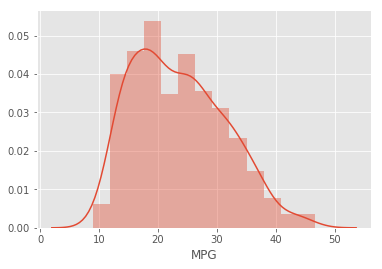

In [17]:
"""Visualize our target feature 'MPG'"""
sns.distplot(dataset['MPG'])

In [18]:
"""Calculate the Skewness and Kurtosis"""

print("Skewness: {}".format(dataset['MPG'].skew()))
print("Kurtosis: {}".format(dataset['MPG'].kurt()))

Skewness: 0.45706634399491913
Kurtosis: -0.5107812652123154


<i>Skewness</i>: It measures the <b>degree of distortion</b> from the normal distribution curve. A symmetric distribution is having the Skewness value equals to zero (i.e. Mean = Median = Mode).

There are two types of skewness -
- Positive Skewness
- Negative Skewness

<img src="./skewness.jpeg">

<b>Key points to note:</b>
- If the skewness value lies between -0.5 to 0.5, then we can say that the data is fairly symmetrical. (That's a good sign) <b>Which is in our case</b>.
- If the skewness value lies between -1 to -0.5 then we can say that the data is negatively skewed. And if the skewness value lies between 0.5 ti 1 then we can say that the data is positively skewed.
- If the value of skewness is less than -1 or greater than 1, then we can say that the data is highly skewed.

<i>Kurtosis</i>: It is used to measure the outliners present in the distortion. I also tell us the height and sharpness of the central peak, relative to that of normal distribution.<i> Kurtosis of normal distribution is 3</i>.

<b>Conclusion: </b>We are having a good data.

<b>Visualize the categorical features</b>

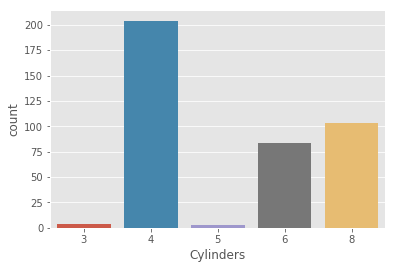

In [19]:
"""Visualize the Cylinder feature"""
sns.countplot(dataset['Cylinders'])

<b>Note: </b>By seeing the above barplot, we can see that we are having enough dataset of Type 4 cylinder. But the type 3 and type 5 cylinders are in very much less ratio. Hence, we will make sure at the time of splitting into the training and testing dataset, both the dataset should have same ratio of cylinder types.

In [20]:
"""In Percentage, type of cylinders avaliable"""

print("Percentage of type 3 cylinders are {}".format(
    (len(dataset[dataset['Cylinders'] == 3]) / len(dataset)) * 100)
     )
print("Percentagee of type 4 cylinders are {}".format(
    (len(dataset[dataset['Cylinders'] == 4]) / len(dataset)) * 100)
     )
print("Percentage of type 5 cylinders are {}".format(
    (len(dataset[dataset['Cylinders'] == 5]) / len(dataset)) * 100)
     )
print("Percentage of type 6 cylinders are {}".format(
    (len(dataset[dataset['Cylinders'] == 6]) / len(dataset)) * 100)
     )
print("Percentage of type 8 cylinders are {}".format(
     (len(dataset[dataset['Cylinders'] == 8]) / len(dataset)) * 100)
     )

Percentage of type 3 cylinders are 1.0050251256281406
Percentagee of type 4 cylinders are 51.256281407035175
Percentage of type 5 cylinders are 0.7537688442211055
Percentage of type 6 cylinders are 21.105527638190953
Percentage of type 8 cylinders are 25.879396984924625


In [21]:
"""We can also count the number of different type of cylinders available."""
dataset['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

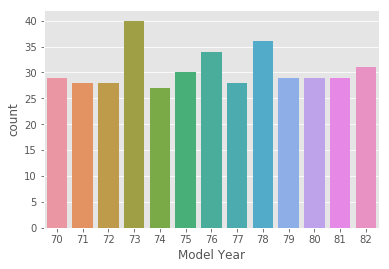

In [22]:
"""Visualize the Model Year feature"""
sns.countplot(dataset['Model Year'])

In [23]:
"""We can also count the total number of different type of model year categories available"""
dataset['Model Year'].value_counts().sort_index()

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: Model Year, dtype: int64

Maximum number of models are of <b>year 73</b>. 

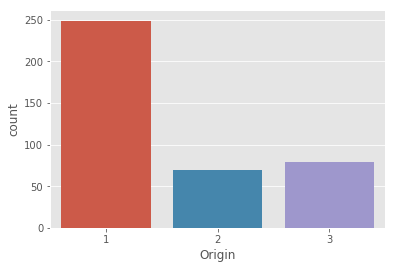

In [24]:
"""Visualize the Origin feature"""

sns.countplot(dataset['Origin'])

In [25]:
"""We can also count the total number of diffenent 'Origin' categories avaliable."""
dataset['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

<b>One-Hot Encoding</b>

After visualizing all the categorical features i.e. Cylinders, Model Year, and Origin. We decided to do the <b>one-hot encoding</b> of the <b>Origin feature</b> only.

<i>If the question "Why we only do one-hot encoding of the Origin feature?" is coming in your mind then let me explain you.</i>

Most of the algorithms work with the <i>numeric</i> data. It's hard for an algorithm to differentiate between the <i>categorical and numeric</i> data untill or unless we specify. That is the reason why we applied the concept of <i>encoding</i> in case of categorical data.

The encoding can be done in mainly two ways :
* Integer Encoding
* One-Hot Encoding

The example of integer encoding is the <i>Origin data</i> in our dataset, where <b><i>"USA" is 1, "Europe" is 2, and "Japan" is 3</b>.

Now, coming back to our point. We will only do the one-hot encoding of the Origin feature, because it is a type of <i>nominal categorical variable</i>. Yes, the categorical variables are of two types the <i>nominal and ordinal</i>. Nominal variables are those where no natural ordered relationship exist. Like in case of Origin data. We can't say <i>USA > Europe > Japan</i>, or <i>USA = Europe</i>. Obviously, it makes no sense. But in case of ordinal variable, there exist a natural ordered relationship. Like in case of "Cylinders" features, where <i> 4 > 8 > 6</i> actually makes sense.

<i>Hence, in short we do one-hot encoding of the nominal categorical variables.</i> and in our case "Origin" is a nominal type of variable.

<b>That's why we decided to do the <i>one-hot encoding</i> of the 'Origin' feature.</b>

In [26]:
"""Removes the 'Origin' column from the dataset"""
origin = dataset.pop('Origin')
print(dataset.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year'],
      dtype='object')


In [27]:
"""Do the one-hot encoding"""
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


Now, we successfully did the one-hot encoding of the 'Origin'.

#### 4. Split the dataset

Now it's time to split our dataset into training and testing dataset.

In [28]:
"""Split the dataset into features and labels"""
labels = dataset.pop('MPG')
features = dataset

In [29]:
"""Split the dataset"""
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state = 3)

In [30]:
"""Have a look at the training dataset"""
features_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
14,4,113.0,95.0,2372.0,15.0,70,0.0,0.0,1.0
47,6,250.0,100.0,3282.0,15.0,71,1.0,0.0,0.0
46,4,140.0,72.0,2408.0,19.0,71,1.0,0.0,0.0
247,4,85.0,70.0,2070.0,18.6,78,0.0,0.0,1.0
355,4,107.0,75.0,2210.0,14.4,81,0.0,0.0,1.0


Now, we have successfully split the dataset into testing and training dataset. Now it's time to build the model.

#### 5. Normalize the dataset

It is good practice to normalize features that use different scales and ranges.

In [31]:
features_train_des = features_train.describe().transpose()
features_train_des

,count,mean,std,min,25%,50%,75%,max
Cylinders,298.0,5.489933,1.713945,3.0,4.000,4.0,8.000,8.0
Displacement,298.0,196.300336,105.792016,68.0,105.000,151.0,293.250,455.0
Horsepower,298.0,105.672305,38.508721,46.0,77.250,95.0,128.000,225.0
Weight,298.0,3006.161074,856.555199,1613.0,2257.250,2885.0,3612.000,5140.0
Acceleration,298.0,15.530537,2.714317,8.0,13.725,15.5,17.175,24.8
Model Year,298.0,76.080537,3.659804,70.0,73.000,76.0,79.000,82.0
USA,298.0,0.620805,0.486003,0.0,0.000,1.0,1.000,1.0
Europe,298.0,0.184564,0.388596,0.0,0.000,0.0,0.000,1.0
Japan,298.0,0.194631,0.396582,0.0,0.000,0.0,0.000,1.0


In [32]:
"""Define a function to normalize"""
def norm_scale(a):
    b = (a - a.mean())/(a.std())
    return b

In [33]:
"""Normalize the train and test dataset"""
"""Keep in mind that the training and testing dataset normalized by the same method."""
norm_features_train = norm_scale(features_train)
norm_features_test = norm_scale(features_test)

In [34]:
"""Have a look at the training dataset"""
norm_features_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
14,-0.869300,-0.787397,-0.277140,-0.740362,-0.195459,-1.661438,-1.277370,-0.47495,2.030775
47,0.297598,0.507597,-0.147299,0.322033,-0.195459,-1.388199,0.780231,-0.47495,-0.490771
46,-0.869300,-0.532179,-0.874407,-0.698333,1.278209,-1.388199,0.780231,-0.47495,-0.490771
247,-0.869300,-1.052067,-0.926344,-1.092937,1.130842,0.524472,-1.277370,-0.47495,2.030775
355,-0.869300,-0.844112,-0.796503,-0.929492,-0.416509,1.344188,-1.277370,-0.47495,2.030775


In [35]:
"""Have a look at the testing dataset"""
"""Look only just to conform that testing dataset is also scaled"""
norm_features_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
358,-0.810368,-0.651086,-0.722313,-0.281911,0.905239,1.361562,-1.326650,-0.417978,1.929841
16,0.390177,0.141942,-0.104370,-0.110743,-0.062192,-1.518665,0.746241,-0.417978,-0.512996
292,1.590723,1.758113,1.319584,1.325105,-0.925969,0.837884,0.746241,-0.417978,-0.512996
81,-0.810368,-0.881968,-0.238706,-0.709218,0.456074,-0.994987,-1.326650,-0.417978,1.929841
112,-0.810368,-0.631009,-0.426775,-0.682126,0.974341,-0.733149,0.746241,-0.417978,-0.512996


#### 6. Build the model

In Keras, we assemble layers to build a model. A model is nothing but a graph of layers. The most common type of model is a stack of layers called <i>Sequential Models</i>. To build a simple fully connected network we use <i>tf.keras.sequential</i> model.

Building the neural network requires configuring the layers of the model, then compiling the model. A model is nothing but a graoh of layers. First, we stack a few layers together using <i>keras.Sequential</i> (it is the most common type of model used). Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:
- <i>Loss function</i>: measures how accurate the model is during training, we want to minimize this with the optimizer.
- <i>Optimizer</i>: how the model is updated based on the data it sees and its loss function.
-  <i>Metrics</i>: used to monitor the training and testing steps.

Let's build a network with 2 hidden layers of 64 neurons each, and use mean square error (MSE) as the loss function (most common one for regression problems).

In [36]:
# """Create a build model function"""

def build_model():
    
    
#     """Intintiate the Sequential Model"""
    
    model =  keras.Sequential()
    
#     """Let's create two densely/fully-connected hidden layer"""
    
#     """1. First fully connected layer"""
    
#     """Add a fully-connected layer with 64 units to the model
#     Also add non-linearity by using activation function
#     Specifying the input array shape of norm_features_train"""
    
    model.add(layers.Dense(units = 64, activation = tf.nn.relu,
                           input_shape = [norm_features_train.shape[1]]))
#     """
#     Now our model will take an input array of shape (batch_size, input_shape)
#     The batch_size is the size we choose 
#     the output array is of shape (batch_size, units)
#     """
    
#     """
#     The output of dense layer is: output  = activation(dot(input, kernel) + bias)
#     Where <kernel> is the weight matrix created by the layer.
#     And bias is the bias vector also created by the layer.
#     """
    
#     """2. Second fully connected layer"""

#     """Now after the first layer we don't need to specify the size of the input anymore. 
#        Add another layer in the similar way"""

    model.add(layers.Dense(units = 64, activation = tf.nn.relu))
    
    
#     """Output layer"""
    
    model.add(layers.Dense(units = 1))
#     """Single unit represents single node that returns single continuous value"""

    
#     """After successfully adding the layers it's time to compile our model"""
    
#     """There are too many omtimizers out there like:
#        tf.train.MomentumOptimizer, tf.train.AdagradOptimizer, tf.train.AdadeltaOptimizer
#        tf.train.AdamOptimizer, or tf.train.RMSPropOptimizer"""
    
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
#     """The role of the optimizer is to optimize the learning rate.
#        So that we reaches towards the result much faster.
#        It help in increasing rate of training.
#        Suppose we are having a learning rate which adapt or change itself according to the gradient.
#        This type of learning rate is known as 'Adaptive Learning Rate'."""
    
    loss = tf.keras.losses.mse
#     """Loss function is the one that needed to be minimize during optimization
#        It measures the total loss over an entire dataset.
#        Loss function is also known as cost function or object function or empirical risk.
#        Some of the loss functions are: 
#        'mean square error' --> used with regression problems, 
#        'categorical_crossentropy' --> used with multi-class classification problems, or
#        'binary_crossentropy' --> used with binary-class classification problems
        
#        mean square error(mse) = average(sum(predict - actual)^2)"""
    
    metrics = [tf.keras.metrics.mae, tf.keras.losses.mse]
#     """Metrics used to monitor training.
#        Some of the common metrices are:
#        mean absolute error, mean squared error, mean absolute percentage error, 
#        mean squared logarithmic error"""
              
    
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)
    
    return model

In [37]:
"""Call our function to look at the weights"""
model = build_model()

In [38]:
"""Look at the assigned weights by the layer"""
print("Weights are: \n{}".format(model.weights))

Weights are: 
[<tf.Variable 'dense/kernel:0' shape=(9, 64) dtype=float32>, <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'dense_1/kernel:0' shape=(64, 64) dtype=float32>, <tf.Variable 'dense_1/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'dense_2/kernel:0' shape=(64, 1) dtype=float32>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32>]


In [39]:
"""Use 'get_weights' method to see all the weights"""
weights = model.get_weights()

In [40]:
"""Look at the summary of the model we created"""
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


#### 7. Train the model

The model is trained for 1000 epochs

In [41]:
EPOCHS = 1000

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
"""
'batch_size': Number of samples per gradient update. If unspecified, batch_size will default to 32.
(which is in our case)
'epochs': An epoch is an iteration over the entire x and y data provided.
'verbose': Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
'validation_split': Fraction of the training data to be used as validation data. 
The model will set apart this fraction of the training data, will not train on it,
and will evaluate the loss and any model metrics on this data at the end of each epoch.
'validation_data': We can also provide our own validation data to test on.
"""
history = model.fit(x = norm_features_train, y = labels_train, epochs=EPOCHS, 
                    validation_split = 0.2, verbose = 0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

<b>Congratulations, </b>you have successfully trained your model.

Let's visualize the model's training progress.

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
"""Look values at the start of training"""
hist.head()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
0,564.152893,22.685986,564.152893,606.594866,23.390559,606.594866,0
1,537.873177,22.110849,537.873177,579.218121,22.783774,579.218121,1
2,507.527067,21.437089,507.527067,549.972745,22.136305,549.972745,2
3,469.696930,20.580713,469.696930,514.945804,21.347960,514.945804,3
4,422.904651,19.478484,422.904651,470.597244,20.342000,470.597244,4


In [43]:
"""Look values at the end of training"""
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,13.824004,2.715761,13.824004,1.591115,0.842114,1.591115,995
996,14.217002,2.764704,14.217002,1.600627,0.810114,1.600627,996
997,13.869884,2.722414,13.869884,1.542320,0.819017,1.542320,997
998,13.955443,2.723558,13.955443,1.546527,0.806337,1.546527,998
999,14.120915,2.756618,14.120915,1.536815,0.806598,1.536815,999


<b>Conclusion: </b>Mean square error should be as low as possible (for good model).

As we sees, at the start of the training our <i>val_mean_squared_error</i> is near to 564(which is very high). And at the end of the training our <i>val_mean_squared_error</i> come closer to 14(which is a great success). But, it might be possible that some where in the middle it also goes much less. This this we can easily see. So why, it increases at the end. The reason behind it is <b>Overfitting</b>. Yes, the model started overfitting the data.

So the question is, <i>how can we avoid overfitting?</b>, and make our model more accurate. There are mainly two ways of preventing the model from overfitting.
- First, one is using <i>Dropouts</i> (i.e. randomly settingsome activations to zero).
- Second, one is <i>Early Stopping</i> (i.e. stop training before we have a chance to overfit).

So, we will use second method in our model. You can try the first method the see the changes you have in your accuray.

In [44]:
"""Improve the model"""
model_improved = build_model()

"""
The patience parameter is the amount of epochs to check for improvement.
If a set amount of epochs elapses without showing improvement, then automatically stop the training.
"""
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history_improved = model_improved.fit(x = norm_features_train, y = labels_train, epochs=EPOCHS,
                    validation_split = 0.2, batch_size = 32, verbose=0, 
                                      callbacks=[early_stop, PrintDot()])


....................................................................................................
.........................................................................

Now, you see that the model did not completed all the 1000 epochs. Instead it stopped at the point from where onwards the model started overfitting. 

Let's visualize the improved model's training progress.

In [45]:
hist_improved = pd.DataFrame(history_improved.history)
hist_improved['epoch'] = history_improved.epoch
"""Look values at the start of training"""
hist_improved.head()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
0,538.671537,22.123231,538.671537,577.805579,22.782664,577.805579,0
1,510.003617,21.477386,510.003617,548.393513,22.118132,548.393513,1
2,473.851969,20.642958,473.851969,513.848075,21.329274,513.848075,2
3,427.835126,19.535592,427.835126,469.646104,20.294360,469.646104,3
4,370.862144,18.081597,370.862144,415.039153,18.923956,415.039153,4


In [46]:
hist_improved.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
168,8.618880,2.120590,8.618880,4.677666,1.596842,4.677666,168
169,8.548281,2.108537,8.548281,4.543931,1.562256,4.543931,169
170,8.607027,2.093953,8.607027,4.595002,1.570275,4.595002,170
171,8.824853,2.179481,8.824853,4.545251,1.565877,4.545251,171
172,8.943292,2.212052,8.943292,4.593147,1.570206,4.593147,172


Now you can see how much drop in the <i>val_mean_square_error</i> happens. Right from the starting closer to 538.6 till the end closer to 9. And only in 172 epoches. Yes, no need to go far to 1000 epoches and waste your computation and time. 

Always, keep in mind that we are not interested in Training dataset accuracy. We are interesred in testing data accuray. And you will see the difference very soon.

#### 7. Test the model

Let's see how did our improved model performs on the testing dataset.

In [47]:
"""Check accuracy on the testing dataset"""
loss, mae, mse = model.evaluate(norm_features_test, labels_test, verbose=0)

print("Testing set Mean Sqrd Error: {:5.2f} MPG".format(mse))
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing Val Loss Error: {:5.2f} MPG".format(loss))

Testing set Mean Sqrd Error: 10.89 MPG
Testing set Mean Abs Error:  2.45 MPG
Testing Val Loss Error: 10.89 MPG


This is the testing accuray on your simple model.

In [48]:
"""Check accuracy on the testing dataset"""
loss, mae, mse = model_improved.evaluate(norm_features_test, labels_test, verbose=0)

print("Testing set Mean Sqrd Error: {:5.2f} MPG".format(mse))
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing Val Loss Error: {:5.2f} MPG".format(loss))

Testing set Mean Sqrd Error:  9.48 MPG
Testing set Mean Abs Error:  2.31 MPG
Testing Val Loss Error:  9.48 MPG


And, this is the testing accuracy on your improved model and it is slightly better than our simple model. Thst's why we will choose it.

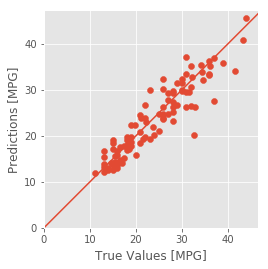

In [49]:
test_predictions = model_improved.predict(norm_features_test).flatten()

plt.scatter(labels_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

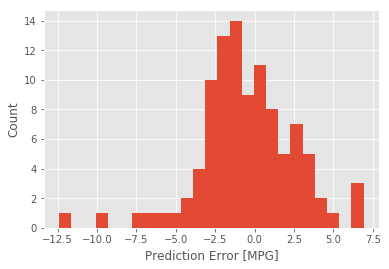

In [50]:
error = test_predictions - labels_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")